In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Reading ExcelFile.
xls = pd.ExcelFile('Data.xlsx')

# Previewing sheet names inside excel file.
xls.sheet_names

['RH K-4 MOY Data',
 'MOY Export',
 'Syracuse',
 'Howard',
 'Swarthmore',
 'Spelman',
 'Williams',
 'Brooklyn',
 'Tuskegee',
 'Northwestern',
 'Georgetown',
 'Wisconsin']

In [3]:
# Combining all student records into a single Data Frame (df), excluding first two summary sheets
df = pd.concat(pd.read_excel(xls, sheet_name=xls.sheet_names[2:]), ignore_index=True)
print(df.shape)
df.head(25)

(274, 17)


,Student_ Number,Grade_Level,Home_room,BOY Indep Level,Grade Level Equiv,Inst Level,Grade Level Equiv.1,MOY Indep Level,Grade Level Equiv.2,Inst Level.1,Grade Level Equiv.3,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
0,236563003.0,0.0,Syracuse,AA,-0.25,NaN,,AA,-0.25,A,0.0,88.0,1.0,3.0,2.0,NaN,5.0
1,238194344.0,0.0,Syracuse,AA,-0.25,NaN,,AA,-0.25,A,0.0,97.0,2.0,2.0,1.0,NaN,3.0
2,239980246.0,0.0,Syracuse,AA,-0.25,NaN,,AA,-0.25,A,0.0,33.0,2.0,1.0,2.0,NaN,3.0
3,240845834.0,0.0,Syracuse,AA,-0.25,NaN,,AA,,AA,-0.25,NaN,3.0,1.0,NaN,NaN,1.0
4,239980196.0,0.0,Syracuse,AA,-0.25,NaN,,AA,,AA,-0.25,NaN,2.0,3.0,1.0,NaN,4.0
5,240414854.0,0.0,Syracuse,AA,-0.25,NaN,,A,0.0,B,0.33,90.0,NaN,1.0,2.0,NaN,3.0
6,240158048.0,0.0,Syracuse,AA,-0.25,NaN,,A,0.0,B,0.33,95.0,NaN,2.0,2.0,NaN,4.0
7,240060129.0,0.0,Syracuse,AA,-0.25,NaN,,A,0.0,B,0.33,90.0,NaN,2.0,1.0,NaN,3.0
8,240267807.0,0.0,Syracuse,AA,-0.25,NaN,,A,0.0,B,0.33,90.0,NaN,3.0,3.0,NaN,6.0
9,236665122.0,0.0,Syracuse,AA,-0.25,NaN,,A,0.0,B,0.33,90.0,NaN,2.0,1.0,NaN,3.0


In [4]:
# previewing df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ Number       274 non-null    float64
 1   Grade_Level           274 non-null    float64
 2   Home_room             274 non-null    object 
 3   BOY Indep Level       273 non-null    object 
 4    Grade Level Equiv    259 non-null    float64
 5    Inst Level           187 non-null    object 
 6    Grade Level Equiv.1  274 non-null    object 
 7   MOY Indep Level       271 non-null    object 
 8    Grade Level Equiv.2  274 non-null    object 
 9    Inst Level.1         264 non-null    object 
 10   Grade Level Equiv.3  254 non-null    object 
 11   Accuracy (%)         218 non-null    float64
 12   Fluency (0-3)        232 non-null    float64
 13   Comp Within (0-3)    251 non-null    float64
 14   Comp Beyond (0-3)    249 non-null    float64
 15   Comp About           1

A couple of noticings:

* The column names are inconsistently formatted and need to be cleaned.
* Some numerical columns need to be casted as such.
* Since the Non-null counts are inconsistent, further investigation is needed.

In [5]:
# Removing spaces and special characters from column names 
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('_',' ')
    
# Renaming Student Number & Homeroom
df.insert(1,'OSIS', df['Student  Number'])
df.insert(2,'Homeroom', df['Home room'])

# Creating list of columns to drop
drop_cols = ['Home room','Student  Number']

# Dropping columns
df.drop(drop_cols, axis=1, inplace=True)

In [6]:
# Renaming columns for easier readibility
df.insert(3,'BOY IP Reading Level', df['BOY Indep Level'])
df.insert(4,'BOY IP Reading Grade Equiv', df['Grade Level Equiv'])
df.insert(5,'BOY Instr Reading Level', df['Inst Level'])
df.insert(6,'BOY Instr Reading Grade Equiv', df['Grade Level Equiv.1'])
df.insert(7,'MOY IP Reading Level', df['MOY Indep Level'])
df.insert(8,'MOY IP Reading Grade Equiv', df['Grade Level Equiv.2'])
df.insert(9,'MOY Instr Reading Level', df['Inst Level.1'])
df.insert(10,'MOY Instr Reading Grade Equiv', df['Grade Level Equiv.3'])

In [7]:
# Dropping columns
drop_cols1 = ['BOY Indep Level','Grade Level Equiv','Inst Level','Grade Level Equiv.1','MOY Indep Level',
            'Grade Level Equiv.2','Inst Level.1','Grade Level Equiv.3']

df.drop(drop_cols1, axis=1, inplace=True)

The reading levels are documented in capital letters. As a precaution, I will make all independent and instructional levels capital.

In [8]:
# Capitalizing all reading levels
reading_level_cols =  ['BOY IP Reading Level','BOY Instr Reading Level',
                       'MOY IP Reading Level', 'MOY Instr Reading Level']

for col in reading_level_cols:
    df[col]=df[col].str.upper()

for i, row in df.iterrows():
    print(f"Index: {i}, {row['BOY IP Reading Level']}, {row['MOY IP Reading Level']}")

Index: 0, AA, AA
Index: 1, AA, AA
Index: 2, AA, AA
Index: 3, AA, AA
Index: 4, AA, AA
Index: 5, AA, A
Index: 6, AA, A
Index: 7, AA, A
Index: 8, AA, A
Index: 9, AA, A
Index: 10, AA, A
Index: 11, AA, B
Index: 12, AA, B
Index: 13, AA, B
Index: 14, AA, B
Index: 15, AA, D
Index: 16, AA, B
Index: 17, AA, C
Index: 18, AA, C
Index: 19, AA, C
Index: 20, AA, D
Index: 21, B, D
Index: 22, AA, D
Index: 23, AA, F
Index: 24,  , AA
Index: 25, AA, B
Index: 26,  , AA
Index: 27, AA, AA
Index: 28, AA, AA
Index: 29, AA,  
Index: 30, AA, AA
Index: 31, AA,  
Index: 32, AA, A
Index: 33, AA, A
Index: 34, AA, A
Index: 35, AA, A
Index: 36, AA,  
Index: 37, AA,  
Index: 38, AA,  
Index: 39, AA, A
Index: 40, AA, B
Index: 41, AA, B
Index: 42, AA, B
Index: 43, AA, C
Index: 44, AA, C
Index: 45, AA, C
Index: 46, AA, C
Index: 47, AA, C
Index: 48, AA, D
Index: 49, AA, D
Index: 50, AA, H
Index: 51, AA, H
Index: 52, AA, nan
Index: 53,  ,  
Index: 54, A, AA
Index: 55, AA, A
Index: 56, B, B
Index: 57, B, B
Index: 58, AA, B
I

In [9]:
# Removing potential spaces from all records

# Placing r in front creates a raw-string literal.
# Character class, \s, matches whitespace character (includes tabs and line breaks)
# Quantifier, *, matches a string that has a space followed by 0 or more spaces.
# Anchors, ^ and $, starts and ends with a space.

# Removal from string columns
for col in df.select_dtypes(include=[object]):
    df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)
    
# Removal from numerical columns


In [10]:
# Checking for completion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSIS                           274 non-null    float64
 1   Homeroom                       274 non-null    object 
 2   Grade Level                    274 non-null    float64
 3   BOY IP Reading Level           260 non-null    object 
 4   BOY IP Reading Grade Equiv     259 non-null    float64
 5   BOY Instr Reading Level        173 non-null    object 
 6   BOY Instr Reading Grade Equiv  173 non-null    object 
 7   MOY IP Reading Level           259 non-null    object 
 8   MOY IP Reading Grade Equiv     234 non-null    object 
 9   MOY Instr Reading Level        256 non-null    object 
 10  MOY Instr Reading Grade Equiv  248 non-null    object 
 11  Accuracy (%)                   218 non-null    float64
 12  Fluency (0-3)                  232 non-null    flo

In [11]:
# Getting summary of missing values
df.isna().sum()

OSIS                               0
Homeroom                           0
Grade Level                        0
BOY IP Reading Level              14
BOY IP Reading Grade Equiv        15
BOY Instr Reading Level          101
BOY Instr Reading Grade Equiv    101
MOY IP Reading Level              15
MOY IP Reading Grade Equiv        40
MOY Instr Reading Level           18
MOY Instr Reading Grade Equiv     26
Accuracy (%)                      56
Fluency (0-3)                     42
Comp Within (0-3)                 23
Comp Beyond (0-3)                 25
Comp About                       154
Total Comp                         0
dtype: int64

A significant amount of data is missing from numerous columns. Rather than automatically drop these columns, I will use the key provided with this analysis to fill this missing data.

In [12]:
# importing BOY info
sheet_url = 'https://docs.google.com/spreadsheets/d/1ctQdLgknVDQ5BPCS-O6UihzK5kPbbVwI-svT3cWKWfw/edit#gid=1026408630'
url1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')        
df_BOY_levels = pd.read_csv(url1, header=1)
df_BOY_levels.head(27)

,Independent Reading Level,Grade Equivalent,K,1,2,3,4,5,6,7,8
0,AA,-0.25,On Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
1,A,0.00,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
2,B,0.33,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
3,C,0.67,Above Grade Level,Approaching Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
4,D,1.00,Above Grade Level,On Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
5,E,1.16,Above Grade Level,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
6,F,1.33,Above Grade Level,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
7,G,1.50,Above Grade Level,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
8,H,1.67,Above Grade Level,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
9,I,1.83,Above Grade Level,Above Grade Level,Approaching Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level


In [13]:
# Importing MOY info
sheet_url = 'https://docs.google.com/spreadsheets/d/1ctQdLgknVDQ5BPCS-O6UihzK5kPbbVwI-svT3cWKWfw/edit#gid=1314641425'
url2 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')        
df_MOY_levels = pd.read_csv(url2, header=1)
df_MOY_levels.head(27)

,Independent Reading Level,Grade Equivalent,K,1,2,3,4,5,6,7,8
0,AA,-0.25,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
1,A,0.00,Approaching Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
2,B,0.33,On Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
3,C,0.67,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
4,D,1.00,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
5,E,1.16,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
6,F,1.33,Above Grade Level,Approaching Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
7,G,1.50,Above Grade Level,On Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
8,H,1.67,Above Grade Level,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level
9,I,1.83,Above Grade Level,Above Grade Level,Below Grade Level,Below Grade Level,Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level,2+ Years Below Grade Level


BOY and MOY Independent Reading Levels & Grade Equivalents are identical.  I will create a dictionary with these level to assist with missing values.

In [14]:
# Dictionary 
alpha_keys = list(df_BOY_levels['Independent Reading Level'].unique())
alpha_values = list(df_BOY_levels['Grade Equivalent'].unique())

levels = dict(zip(alpha_keys, alpha_values))
levels

{'AA': -0.25,
 'A': 0.0,
 'B': 0.33,
 'C': 0.67,
 'D': 1.0,
 'E': 1.16,
 'F': 1.33,
 'G': 1.5,
 'H': 1.67,
 'I': 1.83,
 'J': 2.0,
 'K': 2.33,
 'L': 2.67,
 'M': 3.0,
 'N': 3.33,
 'O': 3.67,
 'P': 4.0,
 'Q': 4.33,
 'R': 4.67,
 'S': 5.0,
 'T': 5.33,
 'U': 5.67,
 'V': 6.0,
 'W': 6.33,
 'X': 6.67,
 'Y': 7.0,
 'Z': 8.0}

In [15]:
# Locating records with missing BOY IP level data
df.loc[(df['BOY IP Reading Level'].isna())]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
24,240415372.0,Syracuse,0.0,NaN,NaN,NaN,NaN,AA,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,0.0
26,239668965.0,Syracuse,0.0,NaN,NaN,NaN,NaN,AA,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,0.0
53,240905430.0,Howard,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
60,205888340.0,Swarthmore,1.0,NaN,NaN,NaN,NaN,C,0.67,D,1.0,99.0,2.0,2.0,2.0,NaN,4.0
67,238231914.0,Swarthmore,1.0,NaN,NaN,NaN,NaN,D,1.0,E,1.16,NaN,1.0,1.0,2.0,NaN,3.0
73,237499462.0,Swarthmore,1.0,NaN,NaN,NaN,NaN,F,1.33,G,1.5,94.0,1.0,NaN,1.0,NaN,1.0
82,234292928.0,Swarthmore,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,218702165.0,Swarthmore,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
138,234743243.0,Williams,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
139,234411106.0,Williams,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


This scholar is Swarthmore has data for the MOY assesment, but not the BOY assessment. I will assume this means the student was not assessed in the BOY. Since it is the beginning I will also assume this means that the student was not present at the time of assessment. I will replace the BOY records with NT (Not Tested).

In [16]:
# Addressing missing data
df['BOY IP Reading Level'].fillna('NT', inplace=True)

df.loc[(df['BOY IP Reading Level']=='NT'), 'BOY IP Reading Grade Equiv']='NT'
df.loc[(df['BOY IP Reading Level']=='NT'), 'BOY Instr Reading Level']='NT'
df.loc[(df['BOY IP Reading Level']=='NT'), 'BOY Instr Reading Grade Equiv']='NT'

In [17]:
# Verifying accuracy
df.loc[(df['BOY IP Reading Level'].isna())]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp


In [18]:
# Locating records with missing BOY Grade Equivalent data
print(df.loc[df['BOY IP Reading Grade Equiv'].isna()].shape)
df.loc[df['BOY IP Reading Grade Equiv'].isna()]

(1, 17)


,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
195,203306691.0,Northwestern,3.0,H,NaN,NaN,NaN,I,NaN,J,NaN,98.0,2.0,3.0,1.0,0.0,4.0


Upon further investigation, only one BOY IP Reading Level was included (student with OSIS # 203306691). I will use the key to fill this missing BOY Grade Equiv for this student. For the other students, my assumption is that a majority do not have beginning year data because they are no longer enrolled in the school. I assumed this because their MOY data is also missing. I will fill those values with NT and eventually drop them from the data frame.

In [19]:
# Replacing grade equivalence for level H
df.loc[(df['OSIS']==203306691),'BOY IP Reading Grade Equiv']=1.67

# Checking to see if change was made.
df.loc[df['OSIS']==203306691]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
195,203306691.0,Northwestern,3.0,H,1.67,NaN,NaN,I,NaN,J,NaN,98.0,2.0,3.0,1.0,0.0,4.0


In [20]:
# Locating records with missing BOY Inst Level data
df.loc[df['BOY Instr Reading Level'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
0,236563003.0,Syracuse,0.0,AA,-0.25,NaN,NaN,AA,-0.25,A,0.0,88.0,1.0,3.0,2.0,NaN,5.0
1,238194344.0,Syracuse,0.0,AA,-0.25,NaN,NaN,AA,-0.25,A,0.0,97.0,2.0,2.0,1.0,NaN,3.0
2,239980246.0,Syracuse,0.0,AA,-0.25,NaN,NaN,AA,-0.25,A,0.0,33.0,2.0,1.0,2.0,NaN,3.0
3,240845834.0,Syracuse,0.0,AA,-0.25,NaN,NaN,AA,NaN,AA,-0.25,NaN,3.0,1.0,NaN,NaN,1.0
4,239980196.0,Syracuse,0.0,AA,-0.25,NaN,NaN,AA,NaN,AA,-0.25,NaN,2.0,3.0,1.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,237900477.0,Northwestern,3.0,P,4.0,NaN,NaN,P,4.0,Q,4.33,99.0,3.0,2.0,2.0,1.0,5.0
232,223455205.0,Georgetown,4.0,Q,4.33,NaN,NaN,Q,4.33,S,5.0,99.0,2.0,3.0,2.0,1.0,6.0
234,223474693.0,Georgetown,4.0,P,4.0,NaN,NaN,Q,4.33,R,4.67,99.0,2.0,3.0,2.0,1.0,6.0
239,205734916.0,Georgetown,4.0,R,4.67,NaN,NaN,R,4.67,S,5.0,98.0,2.0,2.0,2.0,2.0,6.0


In [21]:
# Filling Instructional Level given BOY Independent Levels
i = 0
for i, row in df.iterrows():
    for i in range(len(alpha_keys)-1):
        if pd.isnull(row['BOY Instr Reading Level']):
            for level in alpha_keys:
                df.loc[(df['BOY IP Reading Level']==alpha_keys[i]),
                       'BOY Instr Reading Level']=alpha_keys[i+1]

In [22]:
# Checking for accuracy 
df.loc[df['BOY Instr Reading Level'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp


In [23]:
# Spot-checking with previous student
df.loc[df['OSIS']==203306691]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
195,203306691.0,Northwestern,3.0,H,1.67,I,NaN,I,NaN,J,NaN,98.0,2.0,3.0,1.0,0.0,4.0


In [24]:
# Addressing BOY Instructional Level since all were missing, no conditionals were used.
i = 0
for level, equiv in levels.items():
    df.loc[(df['BOY Instr Reading Level']==level), 'BOY Instr Reading Grade Equiv'] = equiv
    
# Checking for accuracy    
df.tail(25)

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
249,229550850.0,Wisconsin,4.0,K,2.33,L,2.67,K,2.33,L,2.67,99.0,2.0,2.0,2.0,1.0,5.0
250,227215274.0,Wisconsin,4.0,L,2.67,M,3.0,L,2.67,M,3.0,99.0,2.0,2.0,2.0,2.0,6.0
251,209161520.0,Wisconsin,4.0,L,2.67,M,3.0,L,2.67,M,3.0,96.0,2.0,2.0,1.0,1.0,4.0
252,225089911.0,Wisconsin,4.0,M,3.0,N,3.33,N,3.33,P,4.0,99.0,2.0,2.0,0.0,3.0,5.0
253,230635724.0,Wisconsin,4.0,M,3.0,N,3.33,N,3.33,O,3.67,98.0,3.0,2.0,2.0,1.0,5.0
254,230792921.0,Wisconsin,4.0,N,3.33,O,3.67,N,3.33,P,4.0,96.0,2.0,3.0,2.0,2.0,7.0
255,227598208.0,Wisconsin,4.0,N,3.33,O,3.67,N,3.33,O,3.67,97.0,2.0,2.0,1.0,3.0,6.0
256,232006445.0,Wisconsin,4.0,M,3.0,N,3.33,N,3.33,O,3.67,100.0,2.0,3.0,1.0,1.0,5.0
257,219805173.0,Wisconsin,4.0,K,2.33,L,2.67,N,3.33,O,3.67,98.0,NaN,1.0,3.0,2.0,6.0
258,208610493.0,Wisconsin,4.0,N,3.33,O,3.67,N,3.33,P,4.0,97.0,2.0,3.0,2.0,3.0,8.0


In [25]:
# Verifying there are no records with missing BOY Instr Grade Equiv
df.loc[df['BOY Instr Reading Level'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp


In [26]:
# Completing cleaning process for MOY Data

In [27]:
# Locating records with missing MOY Indepent Level data
df.loc[df['MOY IP Reading Level'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
29,240845776.0,Howard,0.0,AA,-0.25,A,0.0,NaN,NaN,AA,-0.25,NaN,0.0,2.0,0.0,NaN,2.0
31,238866941.0,Howard,0.0,AA,-0.25,A,0.0,NaN,NaN,AA,-0.25,NaN,3.0,1.0,NaN,NaN,1.0
36,240098970.0,Howard,0.0,AA,-0.25,A,0.0,NaN,NaN,B,0.33,NaN,2.0,3.0,2.0,NaN,5.0
37,237294889.0,Howard,0.0,AA,-0.25,A,0.0,NaN,NaN,B,0.33,NaN,2.0,2.0,2.0,NaN,4.0
38,240015263.0,Howard,0.0,AA,-0.25,A,0.0,NaN,NaN,B,0.33,NaN,NaN,3.0,2.0,NaN,5.0
52,234033942.0,Howard,0.0,AA,-0.25,A,0.0,NaN,NaN,A,0.0,NaN,1.0,3.0,1.0,NaN,4.0
53,240905430.0,Howard,0.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82,234292928.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,218702165.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
110,234623817.0,Spelman,1.0,B,0.33,C,0.67,NaN,NaN,D,1.0,97.0,1.0,3.0,2.0,NaN,5.0


There are 3 students with missing MOY IP Level, but there is an instructional level. The instructional level for the BOY was one level above the student's IP BOY level. I will assume MOY Independent Levels follow a similar pattern. MOP IP Levels will be one level below MOY instructional levels.

In [28]:
# Filling MOY Independent Levels given MOY Instructional Level
i = 1
for i in range(len(alpha_keys)-1):
    if (df['MOY IP Reading Level'].isna().any()):
        for level in alpha_keys:
            df.loc[(df['MOY Instr Reading Level']==alpha_keys[i]), 'MOY IP Reading Level']=alpha_keys[i-1]
            i=+1

In [29]:
# Spot-checking for accuracy    
# df.loc[df['OSIS']==234033942]
df.loc[df['OSIS']==203306691]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
195,203306691.0,Northwestern,3.0,H,1.67,I,1.83,I,NaN,J,NaN,98.0,2.0,3.0,1.0,0.0,4.0


In [30]:
df['MOY IP Reading Level'].notnull().shape

(274,)

We now have 274 complete MOY Independent Levels. I will move on to investigate other columns.

In [31]:
# Locating records with missing MOY data
print(df.loc[df['MOY IP Reading Grade Equiv'].isna()].shape)

(40, 17)


In [32]:
df.loc[df['MOY IP Reading Grade Equiv'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
3,240845834.0,Syracuse,0.0,AA,-0.25,A,0.0,Z,NaN,AA,-0.25,NaN,3.0,1.0,NaN,NaN,1.0
4,239980196.0,Syracuse,0.0,AA,-0.25,A,0.0,Z,NaN,AA,-0.25,NaN,2.0,3.0,1.0,NaN,4.0
10,239980253.0,Syracuse,0.0,AA,-0.25,A,0.0,A,NaN,B,0.33,95.0,NaN,3.0,1.0,NaN,4.0
15,240060145.0,Syracuse,0.0,AA,-0.25,A,0.0,D,NaN,E,1.16,NaN,NaN,1.0,1.0,NaN,2.0
16,240060210.0,Syracuse,0.0,AA,-0.25,A,0.0,B,NaN,C,0.67,NaN,NaN,2.0,2.0,NaN,4.0
18,239980154.0,Syracuse,0.0,AA,-0.25,A,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
19,239427610.0,Syracuse,0.0,AA,-0.25,A,0.0,C,NaN,D,1.0,NaN,NaN,2.0,2.0,NaN,4.0
22,240158022.0,Syracuse,0.0,AA,-0.25,A,0.0,D,NaN,E,1.16,NaN,1.0,1.0,1.0,NaN,2.0
23,239980287.0,Syracuse,0.0,AA,-0.25,A,0.0,F,NaN,G,1.5,NaN,2.0,2.0,1.0,NaN,3.0
24,240415372.0,Syracuse,0.0,NT,NT,NT,NT,AA,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [33]:
# Addressing MOY IP Grade Equiv 
for level, equiv in levels.items():
    df.loc[(df['MOY IP Reading Level']==level), 'MOY IP Reading Grade Equiv'] = equiv
    
# Checking for accuracy    
df.loc[df['MOY IP Reading Grade Equiv'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
53,240905430.0,Howard,0.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82,234292928.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,218702165.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
138,234743243.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
139,234411106.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
189,233199898.0,Tuskegee,3.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
190,231197146.0,Tuskegee,3.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [34]:
# Next column: Instructional Level.
df.loc[df['MOY Instr Reading Level'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
18,239980154.0,Syracuse,0.0,AA,-0.25,A,0.0,C,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
53,240905430.0,Howard,0.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
54,237299441.0,Swarthmore,1.0,A,0.0,B,0.33,AA,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82,234292928.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,218702165.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85,237649256.0,Spelman,1.0,B,0.33,C,0.67,C,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
138,234743243.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
139,234411106.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
153,234623676.0,Brooklyn,2.0,G,1.5,H,1.67,J,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
189,233199898.0,Tuskegee,3.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [35]:
# Investigating 10 missing records.
df.loc[df['MOY Instr Reading Level'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
18,239980154.0,Syracuse,0.0,AA,-0.25,A,0.0,C,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
53,240905430.0,Howard,0.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
54,237299441.0,Swarthmore,1.0,A,0.0,B,0.33,AA,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82,234292928.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,218702165.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85,237649256.0,Spelman,1.0,B,0.33,C,0.67,C,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
138,234743243.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
139,234411106.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
153,234623676.0,Brooklyn,2.0,G,1.5,H,1.67,J,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
189,233199898.0,Tuskegee,3.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [36]:
# Filling MOY Instructional Level given MOY Independent Levels
i = 0
for i in range(len(alpha_keys)-1):
    for level in alpha_keys:
        df.loc[(df['MOY IP Reading Level']==alpha_keys[i]),
               'MOY Instr Reading Level']=alpha_keys[i+1]
        i=+1

# Checking for completeness
df.loc[df['MOY Instr Reading Level'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp
53,240905430.0,Howard,0.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82,234292928.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,218702165.0,Swarthmore,1.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
138,234743243.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
139,234411106.0,Williams,2.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
189,233199898.0,Tuskegee,3.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
190,231197146.0,Tuskegee,3.0,NT,NT,NT,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


The data shows that students missing MOY data also were students who are also missing in the BOY. My assumption is that these students were registered, but didnot attend the school. I will drop these records from the data frame.

In [37]:
df.dropna(subset=['MOY IP Reading Grade Equiv'], inplace=True)

In [38]:
df['MOY Instr Reading Grade Equiv'].isna().sum()

19

In [39]:
# Filling MOY Instr Grade Equiv given Instructional Levels
i = 0
for level, equiv in levels.items():
    df.loc[(df['MOY Instr Reading Level']==level), 'MOY Instr Reading Grade Equiv'] = equiv
    
# Checking for completeness
df.loc[df['MOY Instr Reading Grade Equiv'].isna()]

,OSIS,Homeroom,Grade Level,BOY IP Reading Level,BOY IP Reading Grade Equiv,BOY Instr Reading Level,BOY Instr Reading Grade Equiv,MOY IP Reading Level,MOY IP Reading Grade Equiv,MOY Instr Reading Level,MOY Instr Reading Grade Equiv,Accuracy (%),Fluency (0-3),Comp Within (0-3),Comp Beyond (0-3),Comp About,Total Comp


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 273
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSIS                           267 non-null    float64
 1   Homeroom                       267 non-null    object 
 2   Grade Level                    267 non-null    float64
 3   BOY IP Reading Level           267 non-null    object 
 4   BOY IP Reading Grade Equiv     267 non-null    object 
 5   BOY Instr Reading Level        267 non-null    object 
 6   BOY Instr Reading Grade Equiv  267 non-null    object 
 7   MOY IP Reading Level           267 non-null    object 
 8   MOY IP Reading Grade Equiv     267 non-null    object 
 9   MOY Instr Reading Level        267 non-null    object 
 10  MOY Instr Reading Grade Equiv  267 non-null    object 
 11  Accuracy (%)                   218 non-null    float64
 12  Fluency (0-3)                  232 non-null    flo

In [41]:
# Investigating Growth

In [42]:
for i, row in df.iterrows():
    print(f"Index: {i}, {row['BOY IP Reading Level']}, {row['MOY IP Reading Level']}")

Index: 0, AA, AA
Index: 1, AA, AA
Index: 2, AA, AA
Index: 3, AA, Z
Index: 4, AA, Z
Index: 5, AA, A
Index: 6, AA, A
Index: 7, AA, A
Index: 8, AA, A
Index: 9, AA, A
Index: 10, AA, A
Index: 11, AA, B
Index: 12, AA, B
Index: 13, AA, B
Index: 14, AA, B
Index: 15, AA, D
Index: 16, AA, B
Index: 17, AA, C
Index: 18, AA, C
Index: 19, AA, C
Index: 20, AA, D
Index: 21, B, D
Index: 22, AA, D
Index: 23, AA, F
Index: 24, NT, AA
Index: 25, AA, B
Index: 26, NT, AA
Index: 27, AA, AA
Index: 28, AA, Z
Index: 29, AA, Z
Index: 30, AA, Z
Index: 31, AA, Z
Index: 32, AA, A
Index: 33, AA, A
Index: 34, AA, A
Index: 35, AA, A
Index: 36, AA, A
Index: 37, AA, A
Index: 38, AA, A
Index: 39, AA, A
Index: 40, AA, B
Index: 41, AA, B
Index: 42, AA, B
Index: 43, AA, C
Index: 44, AA, C
Index: 45, AA, C
Index: 46, AA, C
Index: 47, AA, C
Index: 48, AA, D
Index: 49, AA, D
Index: 50, AA, H
Index: 51, AA, H
Index: 52, AA, AA
Index: 54, A, AA
Index: 55, AA, AA
Index: 56, B, B
Index: 57, B, C
Index: 58, AA, A
Index: 59, AA, A
In

The 4th and 5th student in the data frame shows a BOY Independent Level of AA and MOY Independent Level of Z. A student growing that much in less than a year is highly unlikely. An investigation into these outliers are required.

In [43]:
# Changing data to numerical type
df[['BOY IP Reading Grade Equiv','BOY Instr Reading Grade Equiv','MOY IP Reading Grade Equiv','MOY Instr Reading Grade Equiv']
  ] = df[['BOY IP Reading Grade Equiv','BOY Instr Reading Grade Equiv','MOY IP Reading Grade Equiv','MOY Instr Reading Grade Equiv']
        ].apply(pd.to_numeric, errors='coerce')

In [44]:
# Investigating Outliers by creating a column showing the difference between BOY and MOY levels.
df['BOY-MOY Reading Growth'] = abs(df['MOY IP Reading Grade Equiv'] - df['BOY IP Reading Grade Equiv'])
df['BOY-MOY Reading Growth']

0      0.00
1      0.00
2      0.00
3      8.25
4      8.25
       ... 
269    0.34
270    0.34
271    0.33
272    0.33
273    0.66
Name: BOY-MOY Reading Growth, Length: 267, dtype: float64

In [52]:
df['BOY-MOY Reading Growth'].isna()]

OSIS                               0
Homeroom                           0
Grade Level                        0
BOY IP Reading Level               0
BOY IP Reading Grade Equiv         7
BOY Instr Reading Level            0
BOY Instr Reading Grade Equiv      7
MOY IP Reading Level               0
MOY IP Reading Grade Equiv         0
MOY Instr Reading Level            0
MOY Instr Reading Grade Equiv      0
Accuracy (%)                      49
Fluency (0-3)                     35
Comp Within (0-3)                 16
Comp Beyond (0-3)                 18
Comp About                       147
Total Comp                         0
BOY-MOY Reading Growth             7
BOY Ranking                      267
MOY Ranking                      267
dtype: int64

In [60]:
# Addressing missing data
df['BOY IP Reading Grade Equiv'].fillna('NT', inplace=True)

df.loc[(df['BOY IP Reading Grade Equiv']=='NT'), 'BOY Instr Reading Grade Equiv']='NT'

In [61]:
df.isna().sum()

OSIS                               0
Homeroom                           0
Grade Level                        0
BOY IP Reading Level               0
BOY IP Reading Grade Equiv         0
BOY Instr Reading Level            0
BOY Instr Reading Grade Equiv      0
MOY IP Reading Level               0
MOY IP Reading Grade Equiv         0
MOY Instr Reading Level            0
MOY Instr Reading Grade Equiv      0
Accuracy (%)                      49
Fluency (0-3)                     35
Comp Within (0-3)                 16
Comp Beyond (0-3)                 18
Comp About                       147
Total Comp                         0
BOY-MOY Reading Growth             7
BOY Ranking                      267
MOY Ranking                      267
Instr Reading Grade Equiv        260
dtype: int64

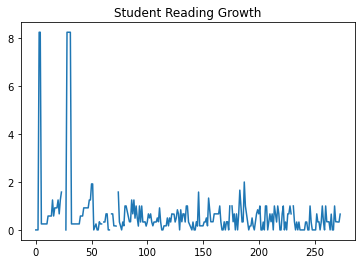

In [46]:
df['BOY-MOY Reading Growth'].plot(title="Student Reading Growth");

Since this analysis compares student's reading levels from the beginning of the school to the middle of school year, I expect to see a few cases of regression, no growth, and atleast a half a year of growth in reading levels. According to F&P Instructional Level Expectations for Reading, students can grow 3-4 levels within a school year. For example, a first grader is expected to enter the grade reading on level E or above and be on level K or above by the end of the school year. For this part of the analysis, I will isolate students who grew more than two grade levels and investigate their growth.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 273
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSIS                           267 non-null    float64
 1   Homeroom                       267 non-null    object 
 2   Grade Level                    267 non-null    float64
 3   BOY IP Reading Level           267 non-null    object 
 4   BOY IP Reading Grade Equiv     260 non-null    float64
 5   BOY Instr Reading Level        267 non-null    object 
 6   BOY Instr Reading Grade Equiv  260 non-null    float64
 7   MOY IP Reading Level           267 non-null    object 
 8   MOY IP Reading Grade Equiv     267 non-null    float64
 9   MOY Instr Reading Level        267 non-null    object 
 10  MOY Instr Reading Grade Equiv  267 non-null    float64
 11  Accuracy (%)                   218 non-null    float64
 12  Fluency (0-3)                  232 non-null    flo

In [48]:
# Creating column with on grade level, above grade level, below grade level.
df['BOY Ranking'] = np.nan
df['MOY Ranking'] = np.nan

In [49]:
# Create column for on grade level or not for BOY and MOY.